### **OBJECT DETECTION USING YOLOV3 AND CV** </p>
This is a mini object detection project that uses the already existing trained model from
**cvlib** and yolov3.
This project is intended to quickly build a machine learning model for deployment.

Essentially, the goal for this project is aimed at deployment and less of model building. </p>
The model is feed with common objects for detection as you will soon see, the function from the cvlib that helps us with
this detection and classification is called **common_object_detection**.

it isn't a robust model for powerful object detection, but it does the work for a project
of this nature.

_Let's begin..._

In [1]:
# Import necessary libraries for this project

import os
from IPython.display import Image, display
import cv2
import cvlib as cv
from cvlib.object_detection import draw_bbox
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [6]:
# An instance of the images' path for detection
image_path = '/Users/Vine/PycharmProjects/yolov3/images'

In [7]:
# create a list of items in the folder
def list_content(file_path, display_list=False):
    """
    :param display_list: if True, prints out list of files
    :param file_path: Folder directory
    :return: a list of filenames in the folder path
    """
    image_names = os.listdir(image_path)
    if display_list is True:
        for images in image_names:
            print(images)
    return image_names

In [8]:
image_files = list_content(file_path=image_path, display_list=False)

The functions you are about to see below are just built to create visualisation of
contents of the images in the given directory.
One function tries to use IPython's function called **display** while the other uses
Matplotlib to create plotting of these images.

_Just for the fun of it..._

In [9]:
def display_object(filename):
    """

    :param filename: list of files to be displayed
    :return: displays objects
    """
    files_to_display = filename[::2]
    for files in files_to_display:
        print(f"Image Name:{files}")
        display(Image(f"/Users/VIne/PycharmProjects/yolov3/images/{files}"))

def plot_objects(files_dir):
    """
    The plot_object function takes in the file paths of selected objects and
    creates a visual plot. This function is built on matplotlib. To display object
    in an m x n format.
    :param files_dir: file path
    :return: return a plot of n files passed as argument
    """
    fig = plt.gcf()
    fig.set_size_inches(10,10)

    def sub_plot_value(files):
        """
        A sub function that works to create an m x n value for the plot function
        :param files: files path from the main function
        :return: value for subplot
        """
        subplot_values = len(files)
        if subplot_values % 2 == 0:
            subplot_values = subplot_values/2
        else:
            subplot_values = (subplot_values + 1)/2
        return subplot_values

    subplot_value = sub_plot_value(files=files_dir)

    for index, element in enumerate(files_dir):
        sub_plt = plt.subplot(subplot_value, subplot_value, index + 1)
        sub_plt.axis('off')
        read_image = mpimg.imread(element)
        plt.imshow(read_image)
    plt.show()

In [10]:
sample_img_path = [os.path.join("images", f_name) for f_name in image_files[::2]]

<ipython-input-9-72768d9cf292>:39: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  sub_plt = plt.subplot(subplot_value, subplot_value, index + 1)


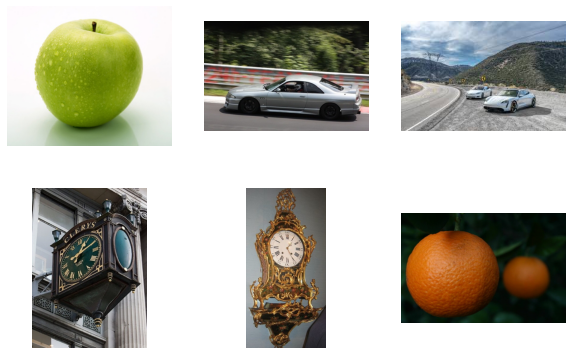

In [11]:
plot_objects(files_dir=sample_img_path)

In [12]:
folder_name = "image_with_boxes"
def make_directory(dir_name):
    if not os.path.exists(dir_name):
        os.mkdir(dir_name)

def detect_images(file_name, model='yolov3-tiny', confidence=0.4):
    """
    
    :param file_name: 
    :param model: 
    :param confidence: 
    :return: 
    """
    file_path = f"images/{file_name}"
    read_img = cv2.imread(file_path)

    bbox, label, conf = cv.detect_common_objects(read_img, confidence=confidence,
                                                 model=model)
    #labl and conf are list objects, hence for element wise representation
    for l, c in zip(label, conf):
        print(f"Detected {l} with confidence level of {c}")

    output_image = draw_bbox(img=read_img,bbox=bbox, labels=label,
                             confidence=conf)
    cv2.imwrite(filename=f"image_with_boxes/{file_name}", img=output_image)

    display(Image(f"image_with_boxes/{file_name}"))


Detected apple with confidence level of 0.5717209577560425
Detected car with confidence level of 0.6325408816337585
Detected car with confidence level of 0.8789581060409546
Detected car with confidence level of 0.7742527723312378
Detected car with confidence level of 0.49985578656196594
Detected clock with confidence level of 0.9683185815811157
Detected clock with confidence level of 0.721041202545166
Detected orange with confidence level of 0.6185590028762817
Detected orange with confidence level of 0.5561689138412476


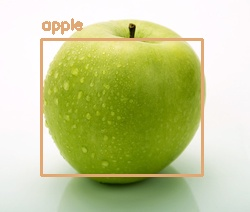

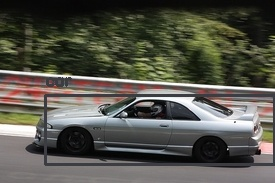

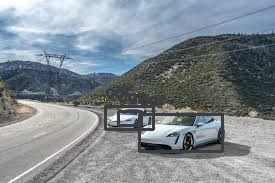

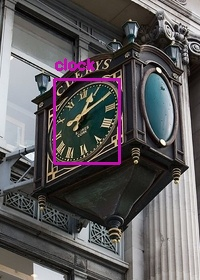

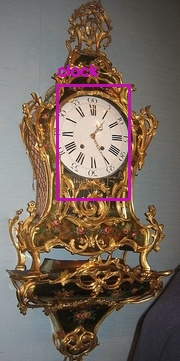

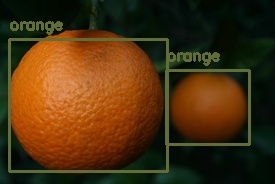

In [13]:
for images in image_files[::2]:
    detect_images(file_name=images)

Detected apple with confidence level of 0.58184814453125
Detected orange with confidence level of 0.5346484184265137
Detected orange with confidence level of 0.515099048614502
Detected apple with confidence level of 0.34759876132011414
Detected orange with confidence level of 0.32876095175743103
Detected apple with confidence level of 0.3124467730522156
Detected orange with confidence level of 0.27986064553260803
Detected orange with confidence level of 0.2749975919723511
Detected apple with confidence level of 0.2744506001472473
Detected orange with confidence level of 0.21419072151184082


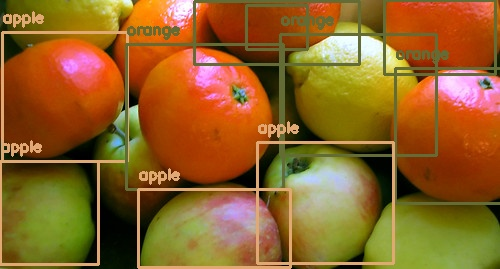

In [17]:
detect_images(file_name='fruits.jpg', confidence=0.2)